# 神经网络模型：

In [8]:
import torch

class Para:
    # tensor_board_log_dir = 'runs/exp0'

    # 模型设置
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    classification = 2 # 2, 3
    nn_in_nums = 22

    # 权重
    cross_weight = list()
    if classification == 3:
        cross_weight = [1.0, 1.0 ,1.0]
    elif classification == 2:
        cross_weight = [1.0, 1.0]
    elif classification == 5:
        cross_weight = [1.0, 1.0, 1.0, 1.0, 1.0]

    batch_size = 32
    lr = 1e-3
    drop = 0.5
    epochs = 500

    # 数据集设置
    month_in_sample = range(0, 59+1)
    # month_test = range(36, 48)

    percent_select = list()
    if classification == 3:
        percent_select = [[0.0,0.2],[0.4,0.6],[0.8, 1.0]] # 上涨，平，下跌
    elif classification == 2:
        percent_select = [[0.0,0.1],[0.9,1.0]]
    elif classification == 5:
        percent_select = [[0.0,0.05],[0.15,0.25],[0.45,0.65],[0.75,0.85],[0.95,1.0]]

    percent_cv = 0.1 # 10% cross validation

    data_path = 'data/cs_space_20d_rate_20d_2017_pre'


    seed = 2022
    torch.manual_seed(seed)

    info_str0 = 'c'+str(classification)+'_y5'+'_p'+str(percent_select)
    info_str1 = '_b'+str(batch_size)+'_lr'+str(lr)+'_d'+str(drop)+'_e'+str(epochs)
    info_str = info_str0 + info_str1

    save_model_path = 'models/'+'model_'+info_str+'.pth'

para = Para()
print(para.info_str)
print(para.save_model_path)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
    print(torch.cuda.current_device())

c2_p[[0.0, 0.1], [0.9, 1.0]]_b32_lr0.001_d0.5_e500
models/model_c2_p[[0.0, 0.1], [0.9, 1.0]]_b32_lr0.001_d0.5_e500.pth
True
1
GeForce MX150
0


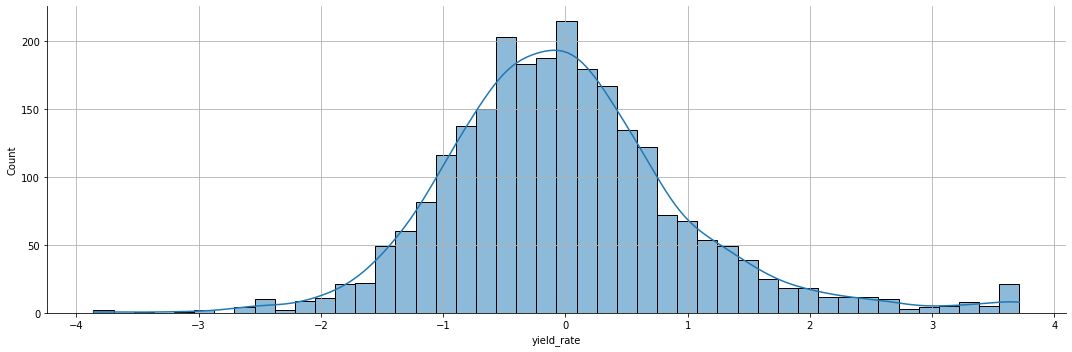

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

temp = pd.read_csv(para.data_path+'/0.csv', index_col='order_book_id')
sns.displot(data=temp['yield_rate'], aspect=3, kde=True, )
plt.grid()

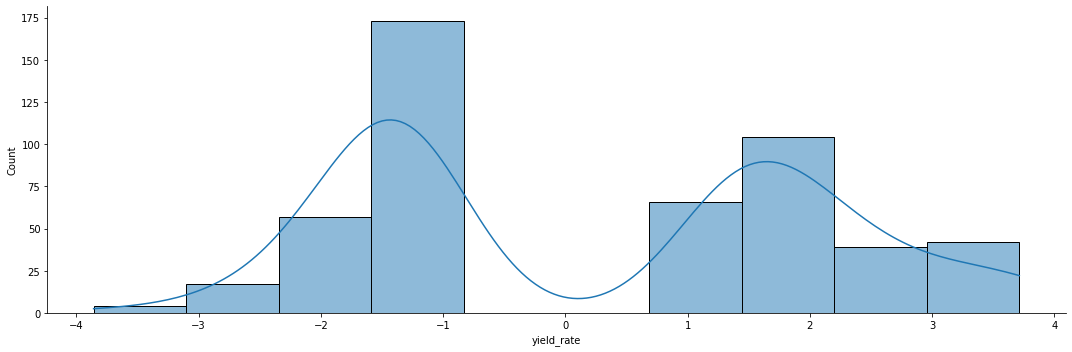

In [3]:
from my_utils.data_process import label_data

temp = label_data(data=temp, percent_select=para.percent_select, is_show=True)

array([[<AxesSubplot:title={'center':'return_bin'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'yield_rate'}>,
        <AxesSubplot:title={'center':'ep_ratio_ttm'}>,
        <AxesSubplot:title={'center':'pb_ratio_ttm'}>],
       [<AxesSubplot:title={'center':'sp_ratio_ttm'}>,
        <AxesSubplot:title={'center':'operating_revenue_growth_ratio_ttm'}>,
        <AxesSubplot:title={'center':'net_profit_growth_ratio_ttm'}>,
        <AxesSubplot:title={'center':'gross_profit_margin_ttm'}>,
        <AxesSubplot:title={'center':'total_asset_turnover_ttm'}>],
       [<AxesSubplot:title={'center':'cash_ratio_lf'}>,
        <AxesSubplot:title={'center':'current_ratio_lf'}>,
        <AxesSubplot:title={'center':'MACD_DIFF'}>,
        <AxesSubplot:title={'center':'MACD_DEA'}>,
        <AxesSubplot:title={'center':'MACD_HIST'}>],
       [<AxesSubplot:title={'center':'RSI10'}>,
        <AxesSubplot:title={'center':'SY'}>,
        <AxesSubplot:title={'center

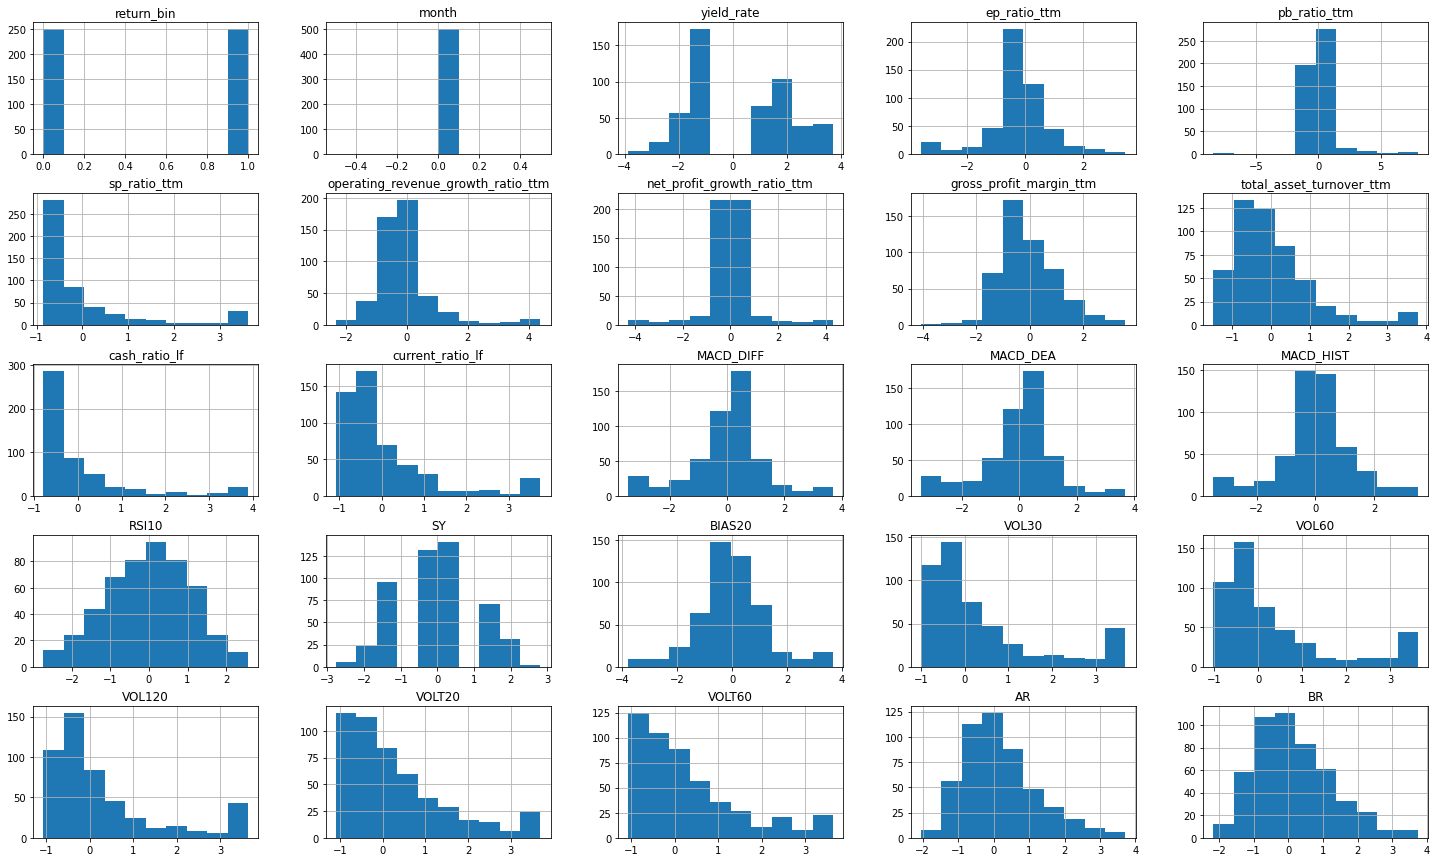

array([[<AxesSubplot:title={'center':'return_bin'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'yield_rate'}>,
        <AxesSubplot:title={'center':'ep_ratio_ttm'}>,
        <AxesSubplot:title={'center':'pb_ratio_ttm'}>],
       [<AxesSubplot:title={'center':'sp_ratio_ttm'}>,
        <AxesSubplot:title={'center':'operating_revenue_growth_ratio_ttm'}>,
        <AxesSubplot:title={'center':'net_profit_growth_ratio_ttm'}>,
        <AxesSubplot:title={'center':'gross_profit_margin_ttm'}>,
        <AxesSubplot:title={'center':'total_asset_turnover_ttm'}>],
       [<AxesSubplot:title={'center':'cash_ratio_lf'}>,
        <AxesSubplot:title={'center':'current_ratio_lf'}>,
        <AxesSubplot:title={'center':'MACD_DIFF'}>,
        <AxesSubplot:title={'center':'MACD_DEA'}>,
        <AxesSubplot:title={'center':'MACD_HIST'}>],
       [<AxesSubplot:title={'center':'RSI10'}>,
        <AxesSubplot:title={'center':'SY'}>,
        <AxesSubplot:title={'center

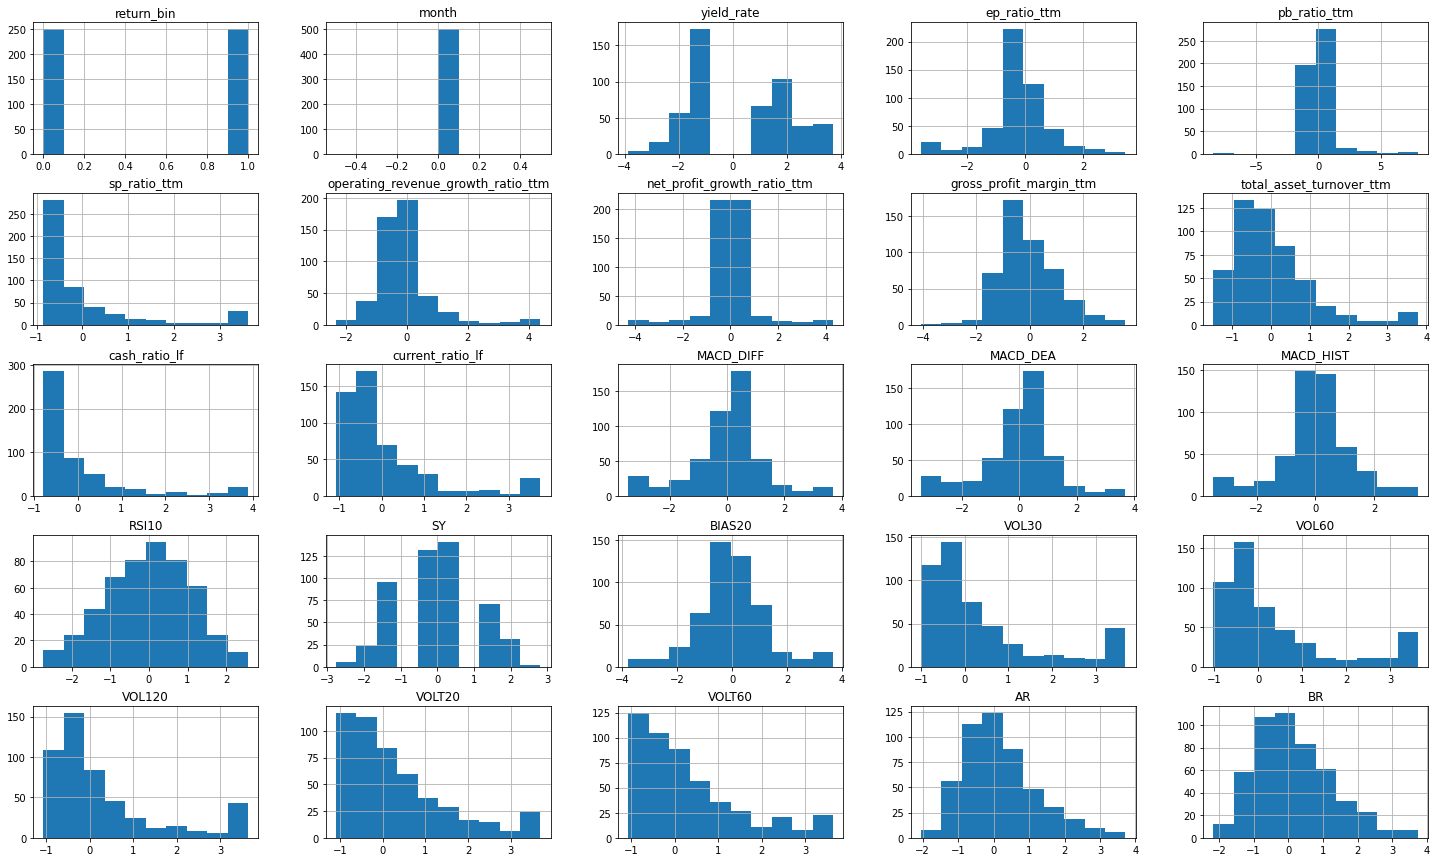

In [5]:
temp.hist(figsize=(25, 15))

In [6]:
temp['return_bin'].value_counts()

0.0    251
1.0    251
Name: return_bin, dtype: int64

### 构建训练集

In [39]:
data_in_sample = None
for i_month in para.month_in_sample:

    file_name = para.data_path + '/' + str(i_month) + '.csv'
    data_curr_month = pd.read_csv(file_name)

    data_curr_month = data_curr_month.dropna(axis=0)

    data_curr_month = label_data(data=data_curr_month, percent_select=para.percent_select)

    if i_month == para.month_in_sample[0]:
        data_in_sample = data_curr_month
    else:
        data_in_sample = pd.concat([data_in_sample, data_curr_month])
        # data_in_sample = data_in_sample.append(data_curr_month)

data_in_sample

,return_bin,order_book_id,board_type,sector_code,yield_rate,month,date,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
424,0.0,000885.XSHE,MainBoard,Industrials,0.647329,0,2017-01-03,-0.856482,-0.250493,-0.057803,...,0.124827,1.216634,1.052064,0.795631,0.108223,-0.108738,1.287368,0.439351,1.816113,2.233850
410,0.0,600698.XSHG,MainBoard,ConsumerDiscretionary,0.607046,0,2017-01-03,-0.857179,0.842102,-0.685842,...,1.645517,-0.377576,3.010919,0.356278,0.536933,0.208048,-0.559844,-0.870122,2.969228,1.647067
1685,0.0,002300.XSHE,MainBoard,Industrials,0.565868,0,2017-01-03,0.475244,-0.241123,0.664563,...,2.566335,0.419529,3.671454,-0.432061,-0.476117,-0.456501,-0.256645,-0.807753,2.130531,3.520148
1897,0.0,600148.XSHG,MainBoard,ConsumerDiscretionary,0.519542,0,2017-01-03,-0.552144,0.881825,-0.531880,...,-0.753930,-1.174682,-0.107875,0.066706,0.217037,-0.175578,0.413983,1.469806,0.671989,0.381272
756,0.0,002651.XSHE,MainBoard,Industrials,0.489685,0,2017-01-03,-0.278014,0.121410,-0.752806,...,0.555885,-0.377576,1.704197,0.643688,0.697964,0.189717,-0.131690,0.026944,0.473782,-0.013720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4.0,688388.XSHG,KSH,Materials,-0.279787,60,2021-12-09,-0.196765,2.196755,-0.716638,...,0.813158,-0.312582,0.838096,0.194436,0.226101,0.263393,3.886241,3.945852,-0.581103,0.010448
2474,4.0,688037.XSHG,KSH,InformationTechnology,-0.280696,60,2021-12-09,-0.365191,3.912075,-0.755046,...,-1.719479,-1.947988,-0.963997,0.378724,0.366924,0.660363,3.679658,3.945852,-0.090133,-0.386687
2964,4.0,300759.XSHE,GEM,HealthCare,-0.295869,60,2021-12-09,-0.240635,2.874582,-0.739719,...,-0.711517,-0.312582,-0.523014,-0.543736,-0.583538,-0.547280,3.000195,3.945852,-0.366047,-0.027960
1741,4.0,688408.XSHG,KSH,Industrials,-0.322788,60,2021-12-09,-0.318136,1.872916,-0.656483,...,-1.348290,-1.130285,-1.439889,-0.129706,-0.026063,0.125492,3.886241,3.945852,-0.513977,-0.593043


In [57]:
X_in_sample = data_in_sample.loc[:, 'ep_ratio_ttm': 'BR']
y_in_sample = data_in_sample.loc[:, 'return_bin']

from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X_in_sample, y_in_sample, test_size=para.percent_cv, shuffle=True, random_state=para.seed)
# X_train, X_cv, y_train, y_cv = train_test_split(X_in_sample, y_in_sample, test_size=para.percent_cv, shuffle=False)

X_train

,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,operating_revenue_growth_ratio_ttm,net_profit_growth_ratio_ttm,gross_profit_margin_ttm,total_asset_turnover_ttm,cash_ratio_lf,current_ratio_lf,MACD_DIFF,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
344,-1.157430,-0.717918,-0.405735,-1.912236,-0.571929,-1.545840,-0.636643,-0.286455,-0.400888,1.395149,...,2.305166,3.165106,3.640365,-0.289036,-0.382994,-0.460216,0.938918,-0.406674,3.337453,2.145647
886,0.434266,-0.414371,0.210717,-0.081954,0.009452,0.363205,0.841308,-0.307326,-0.482403,1.093702,...,0.978650,0.862939,-0.957108,2.543262,1.497259,0.981098,0.029331,0.039942,0.070890,0.681145
805,0.428545,-0.645726,-0.013503,-0.334204,0.086554,-0.229651,0.145277,-0.699186,-0.504343,0.042212,...,0.122248,-1.118997,0.181531,-0.629037,-0.466761,-0.765493,-0.682119,-0.720068,-0.007659,-0.511401
735,0.445242,0.019665,0.715805,-0.468680,-0.131953,-0.744148,1.855003,-0.579212,-0.356217,-0.321528,...,0.030654,0.452661,0.072666,-0.749365,-0.769674,-0.779911,-0.024979,-0.260041,-0.778182,-0.073018
2523,0.591716,-0.012115,-0.168998,1.165047,0.436419,-0.234720,0.322346,-0.632058,-0.378938,0.801432,...,-0.457453,-0.477810,-1.034260,0.244557,0.049973,-0.218802,1.088235,1.785947,0.692057,1.187676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,0.143831,-0.378031,-0.025393,0.293216,0.055017,-0.402608,0.321152,-0.553466,-0.603531,0.507230,...,-0.951006,0.104979,-0.452556,0.259805,-0.060699,-0.327039,0.140691,0.584703,0.143143,0.770324
1510,-0.336068,3.878978,-0.783772,0.161578,0.114217,0.587162,-0.025678,-0.605470,-0.203453,0.948061,...,1.168772,0.838728,2.362827,2.464041,2.794467,2.938879,2.934122,3.230156,2.233425,1.278451
1866,-0.882206,-0.001792,-0.091153,-0.370718,-0.305087,-0.530137,0.673228,-0.681492,-0.343312,3.524890,...,-0.012422,-0.177389,2.114449,3.686015,1.777230,0.579333,3.667987,2.727619,2.983281,1.380827
2499,0.054155,-0.555699,0.442160,-0.481824,-0.020058,-0.562467,0.542024,0.056335,-0.006937,0.559909,...,0.801982,-0.301757,0.630963,-0.314713,-0.274708,0.301232,-0.365524,-0.654055,1.303882,1.395362


In [58]:
y_train

344     1.0
886     1.0
805     0.0
735     0.0
2523    0.0
       ... 
2842    0.0
1510    0.0
1866    1.0
2499    0.0
273     1.0
Name: return_bin, Length: 44085, dtype: float64

In [59]:
data_train = pd.concat([X_train, y_train], axis=1)
data_cv = pd.concat([X_cv, y_cv], axis=1)
data_train

,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,operating_revenue_growth_ratio_ttm,net_profit_growth_ratio_ttm,gross_profit_margin_ttm,total_asset_turnover_ttm,cash_ratio_lf,current_ratio_lf,MACD_DIFF,...,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR,return_bin
344,-1.157430,-0.717918,-0.405735,-1.912236,-0.571929,-1.545840,-0.636643,-0.286455,-0.400888,1.395149,...,3.165106,3.640365,-0.289036,-0.382994,-0.460216,0.938918,-0.406674,3.337453,2.145647,1.0
886,0.434266,-0.414371,0.210717,-0.081954,0.009452,0.363205,0.841308,-0.307326,-0.482403,1.093702,...,0.862939,-0.957108,2.543262,1.497259,0.981098,0.029331,0.039942,0.070890,0.681145,1.0
805,0.428545,-0.645726,-0.013503,-0.334204,0.086554,-0.229651,0.145277,-0.699186,-0.504343,0.042212,...,-1.118997,0.181531,-0.629037,-0.466761,-0.765493,-0.682119,-0.720068,-0.007659,-0.511401,0.0
735,0.445242,0.019665,0.715805,-0.468680,-0.131953,-0.744148,1.855003,-0.579212,-0.356217,-0.321528,...,0.452661,0.072666,-0.749365,-0.769674,-0.779911,-0.024979,-0.260041,-0.778182,-0.073018,0.0
2523,0.591716,-0.012115,-0.168998,1.165047,0.436419,-0.234720,0.322346,-0.632058,-0.378938,0.801432,...,-0.477810,-1.034260,0.244557,0.049973,-0.218802,1.088235,1.785947,0.692057,1.187676,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842,0.143831,-0.378031,-0.025393,0.293216,0.055017,-0.402608,0.321152,-0.553466,-0.603531,0.507230,...,0.104979,-0.452556,0.259805,-0.060699,-0.327039,0.140691,0.584703,0.143143,0.770324,0.0
1510,-0.336068,3.878978,-0.783772,0.161578,0.114217,0.587162,-0.025678,-0.605470,-0.203453,0.948061,...,0.838728,2.362827,2.464041,2.794467,2.938879,2.934122,3.230156,2.233425,1.278451,0.0
1866,-0.882206,-0.001792,-0.091153,-0.370718,-0.305087,-0.530137,0.673228,-0.681492,-0.343312,3.524890,...,-0.177389,2.114449,3.686015,1.777230,0.579333,3.667987,2.727619,2.983281,1.380827,1.0
2499,0.054155,-0.555699,0.442160,-0.481824,-0.020058,-0.562467,0.542024,0.056335,-0.006937,0.559909,...,-0.301757,0.630963,-0.314713,-0.274708,0.301232,-0.365524,-0.654055,1.303882,1.395362,0.0


In [60]:
from torch.utils.data import TensorDataset
import torch

X_train_ndarray = X_train.values
y_train_ndarray = y_train.values

train_dataset = TensorDataset(torch.from_numpy(X_train_ndarray).type(torch.FloatTensor), torch.from_numpy(y_train_ndarray).type(torch.LongTensor))

# for X_train_temp, y_train_temp in train_dataset:
#     print(X_train_temp, y_train_temp)
#     print(X_train_temp.dtype, y_train_temp.dtype)

In [61]:
X_cv_ndarray = X_cv.values
y_cv_ndarray = y_cv.values

cv_dataset = TensorDataset(torch.from_numpy(X_cv_ndarray).type(torch.FloatTensor), torch.from_numpy(y_cv.values).type(torch.LongTensor))

# for X_cv_temp, y_cv_temp in cv_dataset:
#     print(X_cv_temp, y_cv_temp)
#     print(X_cv_temp.dtype, y_cv_temp.dtype)

In [62]:
from torch.utils.data import DataLoader


train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=para.batch_size,
    shuffle=True
)

cv_dataloader = DataLoader(
    dataset=cv_dataset,
    batch_size=para.batch_size,
    shuffle=True
)

### 构建测试集

In [63]:
# data_test = None
# for i_month in para.month_test:
#
#     file_name = para.data_path + '/' + str(i_month) + '.csv'
#     data_curr_month = pd.read_csv(file_name)
#
#     data_curr_month = data_curr_month.dropna(axis=0)
#
#     data_curr_month = label_data(data=data_curr_month, percent_select=para.percent_select)
#
#     if i_month == para.month_test[0]:
#         data_test = data_curr_month
#     else:
#         data_test = pd.concat([data_test, data_curr_month])
#         # data_test = data_test.append(data_curr_month)
#
# X_test = data_test.loc[:, 'ep_ratio_ttm': 'BR']
# y_test = data_test.loc[:, 'return_bin']

In [64]:
# from torch.utils.data import TensorDataset
# import torch
#
#
# X_test_ndarray = X_test.values
# y_test_ndarray = y_test.values
#
# test_dataset = TensorDataset(torch.from_numpy(X_test_ndarray).type(torch.FloatTensor), torch.from_numpy(y_test_ndarray).type(torch.LongTensor))

In [65]:
# from torch.utils.data import DataLoader
#
#
# test_dataloader = DataLoader(
#     dataset=test_dataset,
#     batch_size=para.batch_size,
#     shuffle=True,
# )

### 构建神经网络

In [66]:
from my_utils.model_class import MLP

model = MLP(in_nums=len(X_train.columns), out_nums=para.classification, drop_p=para.drop)
# to device
model = model.to(device=para.device)
print(model)

MLP(
  (linear_stack): Sequential(
    (0): Linear(in_features=22, out_features=16, bias=True)
    (1): Dropout(p=0.5, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=2, bias=True)
  )
)


### 训练与测试

In [67]:
import torchmetrics


def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    train_loss, correct = 0, 0

    # initialize metric
    train_precision = torchmetrics.Precision(average='none', num_classes=para.classification).to(device=para.device)

    for batch, (X, y) in enumerate(dataloader):

        # to device
        X = X.to(device=para.device)
        y = y.to(device=para.device)

        # compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        train_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # metric on current batch
        train_precision(pred.argmax(1), y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch % 10 == 0:
        #     loss, current = loss.item(), batch * len(X)
        #     print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_loss /= num_batches
    correct /= size
    print(f"Train Error: \n    Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")

    # metric on all batches using custom accumulation
    total_precision = train_precision.compute()
    print("Precision of every train dataset class: ", total_precision)
    print()

    return correct, train_loss, total_precision


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # initialize metric
    test_precision = torchmetrics.Precision(average='none', num_classes=para.classification).to(device=para.device)

    with torch.no_grad():
        for X, y in dataloader:

            # to device
            X = X.to(device=para.device)
            y = y.to(device=para.device)

            # compute prediction and loss
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

            # metric on current batch
            test_precision(pred.argmax(1), y)


    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n    Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    # metric on all batches using custom accumulation
    total_precision = test_precision.compute()
    print("Precision of every test dataset class: ", total_precision)
    print()

    return correct, test_loss, total_precision

In [68]:
def select_df_to_dataloader(df: pd.DataFrame, select: int) -> DataLoader:

    df = df[df['return_bin'] == select]

    df_dataset = TensorDataset(
        torch.from_numpy(df.loc[:, 'ep_ratio_ttm': 'BR'].values).type(torch.FloatTensor),
        torch.from_numpy(df.loc[:, 'return_bin'].values).type(torch.LongTensor))

    df_dataloader = DataLoader(
        dataset=df_dataset,
        batch_size=para.batch_size,
        shuffle=True,
    )

    return df_dataloader

In [69]:
# temp2_dataloader = select_df_to_dataloader(df=data_cv, select=2)
temp1_dataloader = select_df_to_dataloader(df=data_cv, select=1)
temp0_dataloader = select_df_to_dataloader(df=data_cv, select=0)

In [70]:
from torch import nn
import time
from torch.utils.tensorboard import SummaryWriter

# 计时
time_start = time.time()

# writer = SummaryWriter(para.tensor_board_log_dir)
writer = SummaryWriter()

# 损失函数
loss_fn = nn.CrossEntropyLoss()
# to device
loss_fn = loss_fn.to(device=para.device)

# 优化器
optimizer = torch.optim.Adam(model.parameters(), lr=para.lr)

epochs = para.epochs
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")

    model.train()
    accuracy_train, loss_train, precision_train = train_loop(train_dataloader, model, loss_fn, optimizer)
    model.eval()
    accuracy_cv, loss_cv, precision_cv = test_loop(cv_dataloader, model, loss_fn)

    # accuracy2 = test_loop(temp2_dataloader, model, loss_fn)
    # print('#')
    # accuracy1 = test_loop(temp1_dataloader, model, loss_fn)
    # accuracy0 = test_loop(temp0_dataloader, model, loss_fn)

    # 写入 tensorboard
    if para.classification == 2:

        writer.add_scalars(main_tag=para.info_str+'_evaluation/cv',
                           tag_scalar_dict={
                               'accuracy': accuracy_cv,
                               'precision0': precision_cv[0],
                               'precision1': precision_cv[1]},
                           global_step=t)

        writer.add_scalars(main_tag=para.info_str+'_evaluation/train',
                           tag_scalar_dict={
                               'accuracy': accuracy_train,
                               'precision0': precision_train[0],
                               'precision1': precision_train[1]},
                           global_step=t)

    elif para.classification == 3:

        writer.add_scalars(main_tag=para.info_str+'_evaluation/cv',
                           tag_scalar_dict={
                               'accuracy': accuracy_cv,
                               'precision0': precision_cv[0],
                               'precision1': precision_cv[1],
                               'precision2': precision_cv[2]},
                           global_step=t)

        writer.add_scalars(main_tag=para.info_str+'_evaluation/train',
                           tag_scalar_dict={
                               'accuracy': accuracy_train,
                               'precision0': precision_train[0],
                               'precision1': precision_train[1],
                               'precision2': precision_train[2]},
                           global_step=t)

    elif para.classification == 5:

        writer.add_scalars(main_tag=para.info_str+'_evaluation/cv',
                           tag_scalar_dict={
                               'accuracy': accuracy_cv,
                               'precision0': precision_cv[0],
                               'precision1': precision_cv[1],
                               'precision2': precision_cv[2],
                               'precision3': precision_cv[3],
                               'precision4': precision_cv[4]},
                           global_step=t)

        writer.add_scalars(main_tag=para.info_str+'_evaluation/train',
                           tag_scalar_dict={
                               'accuracy': accuracy_train,
                               'precision0': precision_train[0],
                               'precision1': precision_train[1],
                               'precision2': precision_train[2],
                               'precision3': precision_train[3],
                               'precision4': precision_train[4]},
                           global_step=t)

    writer.add_scalars(main_tag=para.info_str+'_loss/cv',
                       tag_scalar_dict={
                           'loss': loss_cv},
                       global_step=t)

    writer.add_scalars(main_tag=para.info_str+'_loss/train',
                       tag_scalar_dict={
                           'loss': loss_train},
                       global_step=t)
    writer.flush()

    time_end = time.time()
    print('Time cost = %fs' % (time_end - time_start))
    print()

writer.close()

print("Done!")

Epoch 1
-------------------------------
Train Error: 
    Accuracy: 53.0%, Avg loss: 0.691016 

Precision of every train dataset class:  tensor([0.5215, 0.5490], device='cuda:0')

Test Error: 
    Accuracy: 56.9%, Avg loss: 0.682787 

Precision of every test dataset class:  tensor([0.5561, 0.5919], device='cuda:0')

Time cost = 22.707768s

Done!


## 保存模型

In [71]:
torch.save(model.state_dict(), para.save_model_path)

print('Finish save model!')

Finish save model!


## captum

In [72]:
# # captum
# from captum.attr import IntegratedGradients
#
# ig = IntegratedGradients(model)

In [73]:
# temp = cv_dataloader.dataset.tensors[0]
# temp.requires_grad_()
# attr, delta = ig.attribute(temp,target=1, return_convergence_delta=True)
# attr = attr.detach().numpy()

In [74]:
# # Helper method to print importances and visualize distribution
# def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
#     print(title)
#     for i in range(len(feature_names)):
#         print(feature_names[i], ": ", '%.3f'%(importances[i]))
#     y_pos = (np.arange(len(feature_names)))
#     if plot:
#         plt.figure(figsize=(20,6))
#         plt.barh(y_pos, importances, align='center')
#         plt.yticks(y_pos, feature_names)
#         plt.ylabel(axis_title)
#         plt.grid(axis='y')
#         plt.title(title)
# visualize_importances(feature_names=X_cv.columns.values.tolist(), importances=np.mean(attr, axis=0))

In [75]:
# X_cv.columns.values.tolist()

In [76]:
# loss = nn.CrossEntropyLoss()
# input = torch.Tensor(
#     [[-0.0441,  0.0773],
#     [-0.0781, -0.1772],
#     [-0.1319, -0.0432],
#     [-0.0714, -0.1261],
#     [-0.0806, -0.1370],
#     [-0.1730, -0.1472],
#     [-0.0350, -0.0507],
#     [-0.1149, -0.2248]])
# # input = input.reshape(-1,4)
# target = torch.Tensor([0, 1, 1, 0, 0, 0, 0, 0]).type(torch.LongTensor)
# print(input.dtype)
# print(target.dtype)
# output = loss(input, target)
# print(input, target, output)

In [77]:
# # Example of target with class indices
# loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.Tensor([1,4,1]).type(torch.LongTensor)
# output = loss(input, target)
# print(input,target,output)

In [78]:
# loss = nn.BCEWithLogitsLoss()
# input = torch.Tensor([0.5, 0.4, 0.3])
# target = torch.Tensor([0])
# output = loss(input, target)
# print(input, target, output)